# **E7: Detección de Anomalías con Isolation Forest**  

## **Objetivo**  
Implementar **Isolation Forest** para detectar anomalías en datos de consumo energético y meteorología.  

## **Datos de entrada**  
Un dataset con las siguientes columnas:  
- **Consumo Energía (kWh)**  
- **Generación FV (kWh)**  
- **Temperatura (°C)**  
- **Radiación Solar (W/m²)**  

---

# **Pasos a seguir**  

## 1️⃣ Cargar y visualizar los datos  

In [2]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  

# Cargar dataset
df = pd.read_csv("data/m4_datos_energia_canarias.csv", usecols=range(1, 6) )

df['Fecha'] = pd.to_datetime(df['Fecha'])
df = df.set_index('Fecha')
# Ver las primeras filas
print(df.head())



            Consumo Energía (kWh)  Generación FV (kWh)  Temperatura (°C)  \
Fecha                                                                      
2023-01-01             259.514697           164.004193         20.477757   
2023-01-02             299.305789           173.408325         18.215363   
2023-01-03             307.509279           170.269137         21.074604   
2023-01-04             316.606347           171.587572         16.938845   
2023-01-05             299.377762           158.578316         22.488135   

            Radiación Solar (W/m²)  
Fecha                               
2023-01-01              496.039170  
2023-01-02              504.088217  
2023-01-03              400.357468  
2023-01-04              546.224484  
2023-01-05              517.902633  


In [3]:
df.describe()

,Consumo Energía (kWh),Generación FV (kWh),Temperatura (°C),Radiación Solar (W/m²)
count,362.000000,360.000000,361.000000,363.000000
mean,286.920289,199.401433,20.226564,604.009230
std,25.891524,25.749239,4.038290,83.308007
min,227.544904,139.773673,10.635462,356.193982
25%,268.790405,179.458116,16.950147,538.175121
50%,290.496053,199.686554,20.112155,605.683791
75%,306.836800,219.873898,23.564546,663.399229
max,343.118236,260.035128,29.389797,820.997031


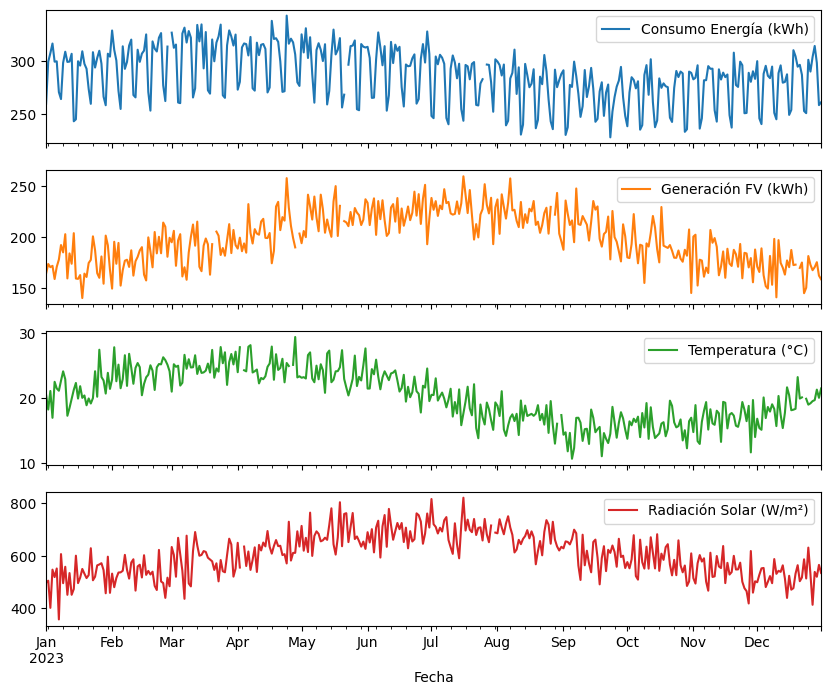

In [4]:
# Visualizar las variables clave
df.plot(subplots=True, figsize=(10, 8))
plt.show()

---

## 2️⃣ Preprocesamiento  
- **Rellenar valores nulos**  
- **Normalizar datos** para mejorar la detección  

In [5]:
# Rellenar valores nulos
df.interpolate(inplace=True)

# Normalización Min-Max
df_normalized = (df - df.min()) / (df.max() - df.min())

# Eliminamos series con baja correlación
df_normalized = df_normalized[['Consumo Energía (kWh)','Temperatura (°C)']]

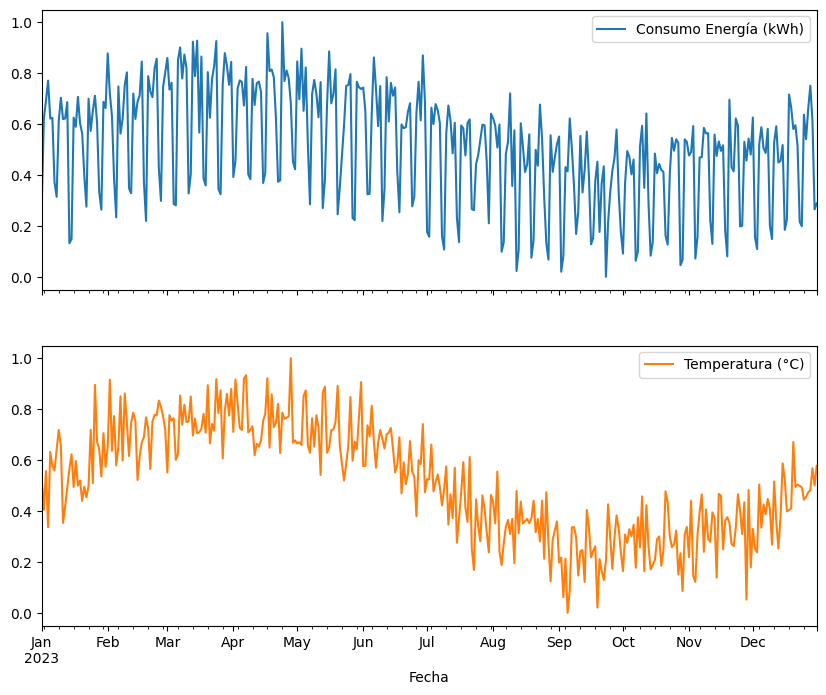

In [6]:
# Visualizar las variables clave
df_normalized.plot(subplots=True, figsize=(10, 8))
plt.show()

---

## 3️⃣ Entrenar Isolation Forest  

In [7]:
from sklearn.ensemble import IsolationForest  

# Inicializar modelo  
model = IsolationForest(contamination=0.10, n_estimators=200, random_state=42)  

# Entrenar y predecir anomalías  
df["Anomaly"] = model.fit_predict(df_normalized)  

# Mostrar conteo de anomalías detectadas
print(df["Anomaly"].value_counts())

Anomaly
 1    328
-1     37
Name: count, dtype: int64


In [8]:
df["Anomaly"]

Fecha
2023-01-01    1
2023-01-02    1
2023-01-03    1
2023-01-04   -1
2023-01-05    1
             ..
2023-12-27    1
2023-12-28    1
2023-12-29    1
2023-12-30    1
2023-12-31    1
Name: Anomaly, Length: 365, dtype: int64

In [9]:
# Contar el número total de anomalías detectadas
num_anomalies = (df["Anomaly"] == -1).sum()
print(f"Número total de anomalías detectadas: {num_anomalies}")


Número total de anomalías detectadas: 37


---

## 4️⃣ Visualizar anomalías  

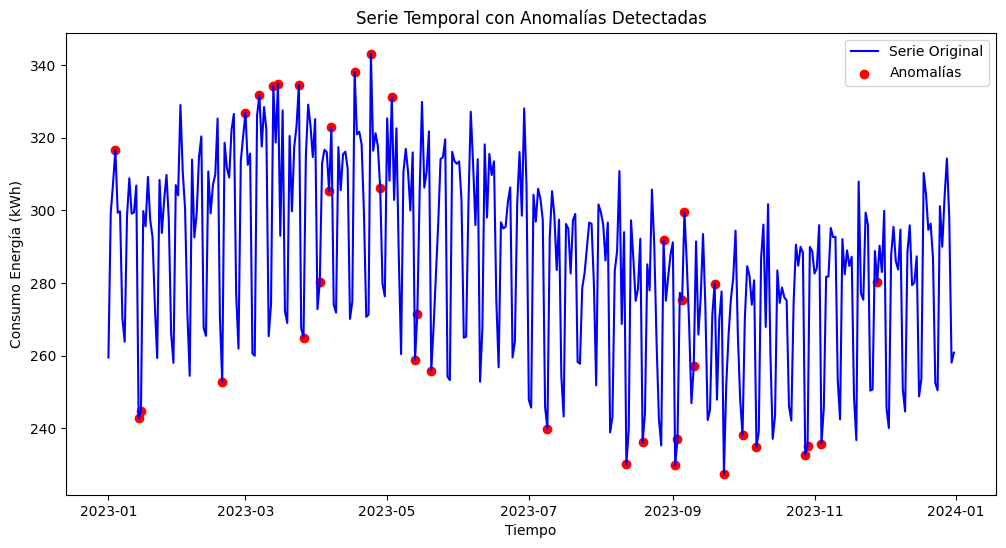

In [10]:
# 5️⃣ Gráfico de línea con anomalías
plt.figure(figsize=(12, 6))
plt.plot(df.index, df["Consumo Energía (kWh)"], label="Serie Original", color="blue")
plt.scatter(df.index[df["Anomaly"] == -1], df["Consumo Energía (kWh)"][df["Anomaly"] == -1],
            color='red', label='Anomalías', marker='o')
plt.xlabel("Tiempo")
plt.ylabel("Consumo Energía (kWh)")
plt.title("Serie Temporal con Anomalías Detectadas")
plt.legend()
plt.show()

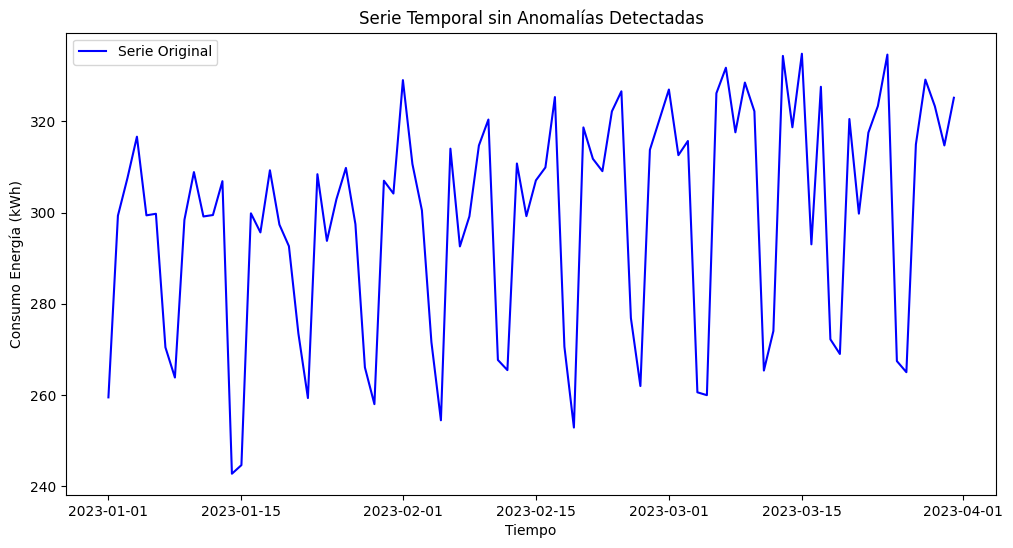

In [11]:
# Aumentamos el zoom en el primer trimestre
plot_df = df[df.index.month < 4]
# 5️⃣ Gráfico de línea con anomalías
plt.figure(figsize=(12, 6))
plt.plot(plot_df.index, plot_df["Consumo Energía (kWh)"], label="Serie Original", color="blue")
plt.xlabel("Tiempo")
plt.ylabel("Consumo Energía (kWh)")
plt.title("Serie Temporal sin Anomalías Detectadas")
plt.legend()
plt.show()

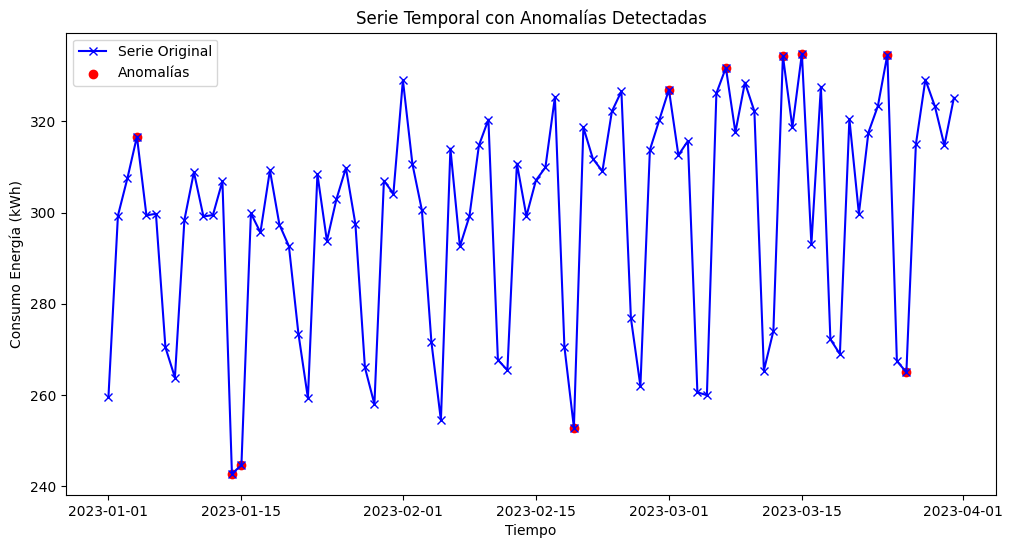

In [12]:
# 5️⃣ Gráfico de línea con anomalías
plt.figure(figsize=(12, 6))
plt.plot(plot_df.index, plot_df["Consumo Energía (kWh)"], label="Serie Original", color="blue", marker="x")
plt.scatter(plot_df.index[plot_df["Anomaly"] == -1], plot_df["Consumo Energía (kWh)"][plot_df["Anomaly"] == -1],
            color='red', label='Anomalías', marker='o')
plt.xlabel("Tiempo")
plt.ylabel("Consumo Energía (kWh)")
plt.title("Serie Temporal con Anomalías Detectadas")
plt.legend()
plt.show()

---

# **Conclusión**  
- Los puntos rojos en la gráfica representan anomalías detectadas.  
- Probar a ajustar el hiperparámetro `contamination` para ver cómo varía la detección.
- Probar a visualizar otros rangos para completar el análisis del detector